# Key Factors Influencing Car Pricing in the US Market

## 1. Understanding dataset and preprocessing

In [726]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [728]:
# Loading the dataset
df=pd.read_csv("CarPrice_Assignment.csv")
df.head(25)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495.000
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,16500.000
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.00,154,5000,19,26,16500.000
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.00,102,5500,24,30,13950.000
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.00,115,5500,18,22,17450.000
5,6,2,audi fox,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,15250.000
6,7,1,audi 100ls,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,17710.000
7,8,1,audi 5000,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,18920.000
8,9,1,audi 4000,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.30,140,5500,17,20,23875.000
9,10,0,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.00,160,5500,16,22,17859.167


In [730]:
# Dropping irrelavant columns
df=df.drop(columns='car_ID')

In [732]:
# Finding unique values
for col in df.columns:
    print(f"\nColumn: {col}")
    print(df[col].unique())


Column: symboling
[ 3  1  2  0 -1 -2]

Column: CarName
['alfa-romero giulia' 'alfa-romero stelvio' 'alfa-romero Quadrifoglio'
 'audi 100 ls' 'audi 100ls' 'audi fox' 'audi 5000' 'audi 4000'
 'audi 5000s (diesel)' 'bmw 320i' 'bmw x1' 'bmw x3' 'bmw z4' 'bmw x4'
 'bmw x5' 'chevrolet impala' 'chevrolet monte carlo' 'chevrolet vega 2300'
 'dodge rampage' 'dodge challenger se' 'dodge d200' 'dodge monaco (sw)'
 'dodge colt hardtop' 'dodge colt (sw)' 'dodge coronet custom'
 'dodge dart custom' 'dodge coronet custom (sw)' 'honda civic'
 'honda civic cvcc' 'honda accord cvcc' 'honda accord lx'
 'honda civic 1500 gl' 'honda accord' 'honda civic 1300' 'honda prelude'
 'honda civic (auto)' 'isuzu MU-X' 'isuzu D-Max ' 'isuzu D-Max V-Cross'
 'jaguar xj' 'jaguar xf' 'jaguar xk' 'maxda rx3' 'maxda glc deluxe'
 'mazda rx2 coupe' 'mazda rx-4' 'mazda glc deluxe' 'mazda 626' 'mazda glc'
 'mazda rx-7 gs' 'mazda glc 4' 'mazda glc custom l' 'mazda glc custom'
 'buick electra 225 custom' 'buick century luxus (

In [734]:
# The field drive wheel has incorrect value 4wd which is replaced as fwd
df['drivewheel'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

In [736]:
# replacing 4wd with fwd
df['drivewheel'] = df['drivewheel'].replace({'4wd': 'fwd'})  

In [738]:
# rechecking the correction
df['drivewheel'].unique()

array(['rwd', 'fwd'], dtype=object)

## 2. Exploratory Data Analysis

In [741]:
# Datapreprocessing and analysis
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   CarName           205 non-null    object 
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

In [743]:
# no null values.

In [745]:
# Statistical Analysis
df.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


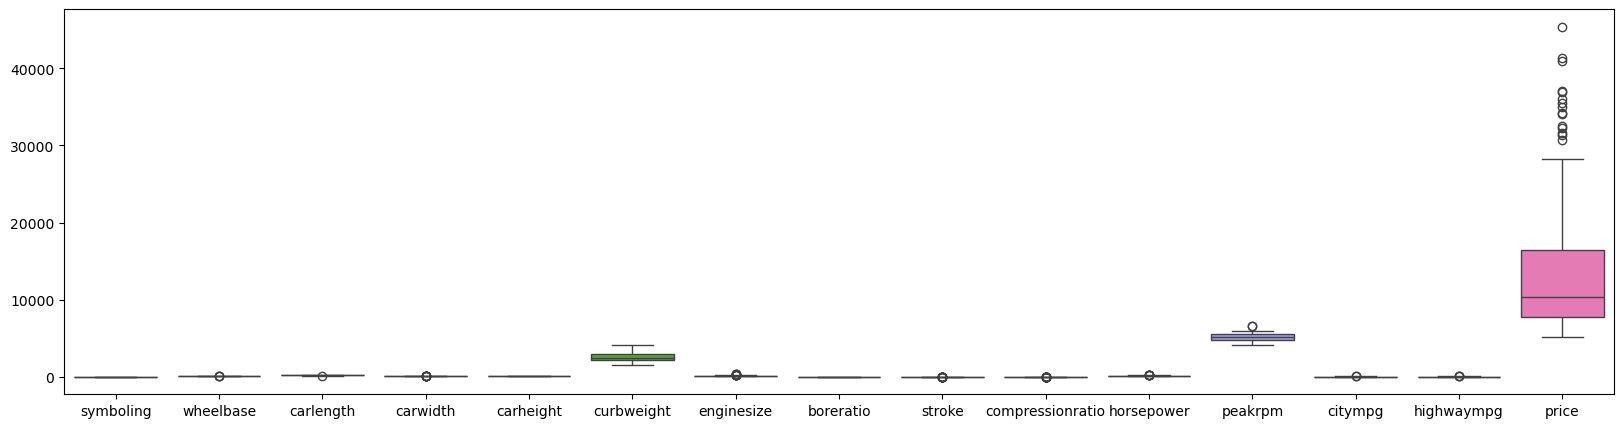

In [747]:
# Detecting outliers
plt.figure(figsize=(20,5))
sns.boxplot(data=df)
plt.show()

In [749]:
# Detecting outliers using IQR
Q1=df['price'].quantile(0.25)
Q3=df['price'].quantile(0.75)
IQR=Q3-Q1
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR

outliers=[(df['price']<=lower_bound)|(df['price']>=upper_bound)]

In [751]:
# Handling outliers by clipping
df['price']=df['price'].clip(lower=lower_bound,upper =upper_bound)

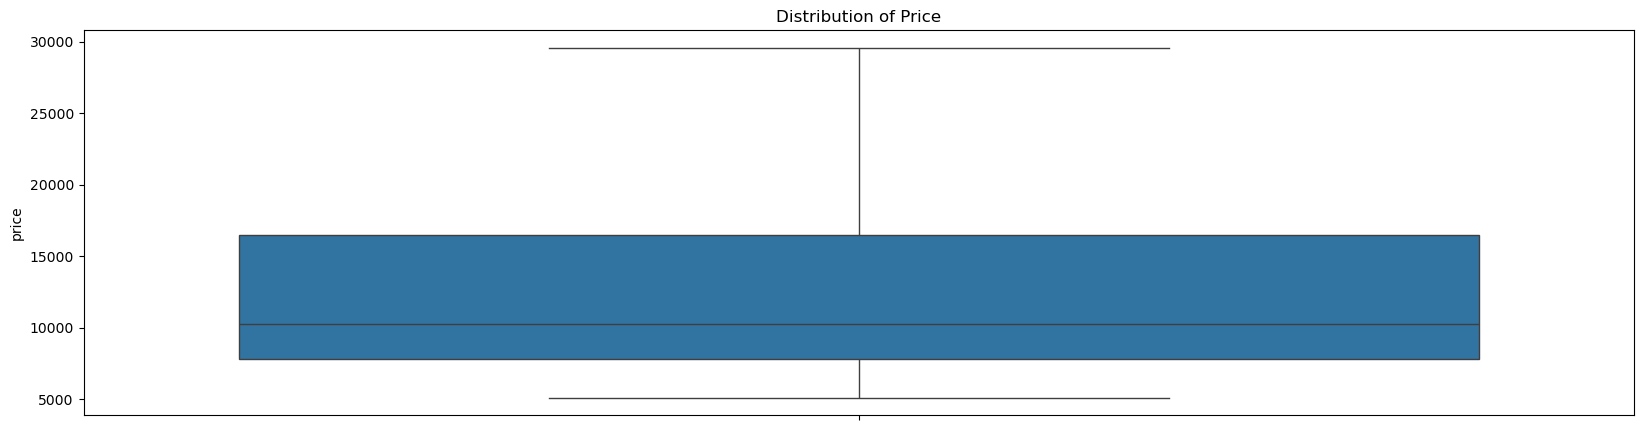

In [753]:
# Visualising after removing outliers
plt.figure(figsize=(20,5))
sns.boxplot(data=df['price'])
plt.title("Distribution of Price")
plt.show()

In [755]:
# Check skewness after outlier removal
print(f"Skewness of price: {df['price'].skew()}")

Skewness of price: 1.222030944709571


In [757]:
# Right skewed hence performing log transformation

In [759]:
# Apply log transformation
df['price'] = np.log(df['price'])

In [761]:
# Checking skewness after log transformation
print("Skewness after log transformation:", df['price'].skew())

Skewness after log transformation: 0.4592541497891898


In [763]:
# Checking for null values
df.isnull().sum()

symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [765]:
# Checking for duplicate values
df.duplicated().sum()

0

In [767]:
# Checking the correlation between the features to remove :
# 1. Highly correlated variables
# 2. Variables with low relation to target variable
corr=df.corr(numeric_only=True)
corr

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
symboling,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.093344
wheelbase,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.632787
carlength,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.773680
carwidth,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.802704
carheight,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.173570
curbweight,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.891886
enginesize,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.800908
boreratio,-0.130051,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.612460
stroke,-0.008735,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.100523
compressionratio,-0.178515,0.249786,0.158414,0.181129,0.261214,0.151362,0.028971,0.005197,0.186110,1.000000,-0.204326,-0.435741,0.324701,0.265201,0.098965


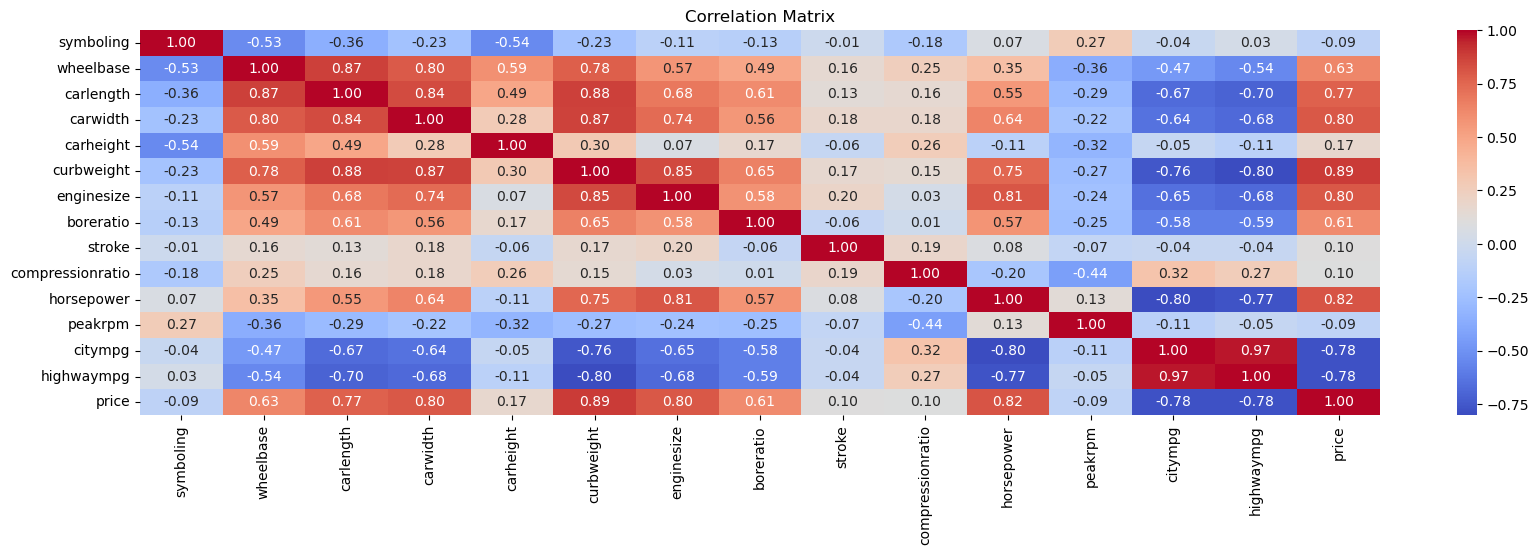

In [769]:
# Visualizing the correlation for better understanding
plt.figure(figsize=(20,5))
sns.heatmap(data=corr,annot=True,cmap='coolwarm',fmt='0.2f')
plt.title("Correlation Matrix")
plt.show()

In [770]:
# Filtering fields with relation to target
corr_target=df.corr(numeric_only=True)[['price']].abs().sort_values(by='price',ascending=False)
corr_target

,price
price,1.000000
curbweight,0.891886
horsepower,0.815741
carwidth,0.802704
enginesize,0.800908
highwaympg,0.777976
citympg,0.776771
carlength,0.773680
wheelbase,0.632787
boreratio,0.612460


In [773]:
# Finding fields that has low realtion to target
low_corelation=corr_target[corr_target['price']<0.10].index.tolist()
low_corelation

['compressionratio', 'symboling', 'peakrpm']

In [775]:
# Dropping fields that has low relation to target
df_corr=df.drop(columns=low_corelation)
df_corr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CarName         205 non-null    object 
 1   fueltype        205 non-null    object 
 2   aspiration      205 non-null    object 
 3   doornumber      205 non-null    object 
 4   carbody         205 non-null    object 
 5   drivewheel      205 non-null    object 
 6   enginelocation  205 non-null    object 
 7   wheelbase       205 non-null    float64
 8   carlength       205 non-null    float64
 9   carwidth        205 non-null    float64
 10  carheight       205 non-null    float64
 11  curbweight      205 non-null    int64  
 12  enginetype      205 non-null    object 
 13  cylindernumber  205 non-null    object 
 14  enginesize      205 non-null    int64  
 15  fuelsystem      205 non-null    object 
 16  boreratio       205 non-null    float64
 17  stroke          205 non-null    flo

In [777]:
# Removing highly related variables
h_relation=df_corr.corr(numeric_only=True).abs()
drop_col=[]
for i in range(len(h_relation.columns)):
    for j in range(i):
        if h_relation.iloc[i,j]>0.9:
            colname_i=h_relation.columns[i]
            colname_j=h_relation.columns[j]
            print(f"{colname_i} is highly correlated with {colname_j}: {h_relation.iloc[i, j]:.2f}")
            if colname_i not in drop_col:                             # to prevent duplicates
                drop_col.append(colname_i)
df_cleaned = df_corr.drop(columns=drop_col)

highwaympg is highly correlated with citympg: 0.97


In [779]:
# Splitting into X and Y
X = df_cleaned.drop(columns='price')
y = df_cleaned['price']

## 3. Feature Engineering

In [782]:
# Performing onehot encoding on categorical values
from sklearn.preprocessing import OneHotEncoder
X_encoded=pd.get_dummies(X,drop_first=True)
X_encoded

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,horsepower,citympg,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,111,21,...,False,False,False,False,False,False,False,True,False,False
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,111,21,...,False,False,False,False,False,False,False,True,False,False
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,154,19,...,False,False,False,False,False,False,False,True,False,False
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,102,24,...,False,False,False,False,False,False,False,True,False,False
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,115,18,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,114,23,...,False,False,False,False,False,False,False,True,False,False
201,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,160,19,...,False,False,False,False,False,False,False,True,False,False
202,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,134,18,...,False,False,False,False,False,False,False,True,False,False
203,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,106,26,...,False,False,False,False,False,True,False,False,False,False


In [784]:
# Splitting into test and train data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_encoded,y,test_size=0.20,random_state=42)

## 4.Feature Scaling

In [787]:

from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_train_scaled=ss.fit_transform(X_train)
X_test_scaled=ss.transform(X_test)

## 5. Implemendation of regression algorithm models and selection

In [790]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

In [792]:
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'Support Vector Regressor': SVR()}

In [794]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

results = []

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    results.append({
        'Model': name,
        'R2 Score': r2_score(y_test, y_pred),
        'MSE': mean_squared_error(y_test, y_pred),
        'MAE': mean_absolute_error(y_test, y_pred)
    })

results_df = pd.DataFrame(results)
print("\nModel Evaluation Results:\n")
print(results_df)


Model Evaluation Results:

                      Model      R2 Score           MSE           MAE
0         Linear Regression -9.249484e+22  2.160392e+22  8.328616e+10
1             Decision Tree  9.102408e-01  2.096497e-02  9.738879e-02
2             Random Forest  9.411494e-01  1.374568e-02  9.207101e-02
3         Gradient Boosting  9.386892e-01  1.432029e-02  9.632340e-02
4  Support Vector Regressor  7.834208e-01  5.058617e-02  1.817420e-01


## 6. Hyperparameter Tuning using GridSearch

In [797]:
# Hyperparameter Tuning-Finding best parameter using Gridsearch
n_estimators=[75,100]
criterion=['squared_error','friedman_mse']
max_depth=[3,5,10]

In [799]:
# passing parameter
parameters={'n_estimators':n_estimators,'criterion':criterion,'max_depth':max_depth}

In [801]:
#Performing grid search
rf=GridSearchCV(RandomForestRegressor(),parameters)

In [803]:
rf.fit(X_train_scaled,y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse'],
                         'max_depth': [3, 5, 10], 'n_estimators': [75, 100]})

In [804]:
# best parameter after grid search
print("Best parameter:",rf.best_params_)

Best parameter: {'criterion': 'squared_error', 'max_depth': 10, 'n_estimators': 75}


In [805]:
# using the best parameter to train the model
best_model=rf.best_estimator_
best_model.fit(X_train_scaled,y_train)

RandomForestRegressor(max_depth=10, n_estimators=75)

In [806]:
#prediction using best parameter
y_predt=best_model.predict(X_test_scaled)
y_predt

array([10.24867371,  9.79761816,  9.11132374,  9.51289949, 10.12414581,
        8.7831486 ,  8.96657208,  8.97288842,  9.25550568,  9.01688188,
        9.59201177,  8.96409335,  9.58854648,  9.28820852, 10.29470159,
        8.73475755,  8.61323743,  9.54812794,  9.07231736,  9.15859867,
        9.2548311 ,  9.64557477,  8.87094377,  8.65535385,  8.88259258,
       10.2528525 ,  9.20374557,  9.70846625,  8.8958324 ,  9.69750905,
       10.14357767,  8.77220925,  9.0052122 ,  9.81866321,  8.99739849,
       10.1345247 ,  9.3443483 ,  9.41852829,  8.8306855 ,  9.56575264,
        9.0658911 ])

In [807]:
print("\nBest Model (Random Forest with Grid Search):")
print("R2 Score:", r2_score(y_test, y_predt))


Best Model (Random Forest with Grid Search):
R2 Score: 0.9427016228626951
